### Importing required Modules

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import seaborn as sns
import numpy as np

### Loading Dataset

In [5]:
df = pd.read_csv("Airbnb_India_Top_500.csv")

In [6]:
df.head()

,address,isHostedBySuperhost,location/lat,location/lng,name,numberOfGuests,pricing/rate/amount,roomType,stars
0,"Manali, Himachal Pradesh, India",False,32.22330,77.18228,HighQ Manali / Deluxe Room,3,8946,Room in hotel,NaN
1,"Manali, Himachal Pradesh, India",False,32.22352,77.18152,Highq manali / 3 BHK Cottage,9,9124,Room in hotel,NaN
2,"Goa, India",False,15.50400,73.86600,Best view of the river from your terrace 04,4,9900,Private room in home,4.00
3,"Bhuntar, Himachal Pradesh, India",False,31.88656,77.14467,Shabashe,1,8684,Shared room in rental unit,NaN
4,"Jaipur, Rajasthan, India",False,26.85991,75.66909,Luxurious Independent Studio with Wifi & Kitchen,1,20690,Entire condo,4.75


In [7]:
df.isna().sum()/df.shape[0]*100

address                 0.0
isHostedBySuperhost     0.0
location/lat            0.0
location/lng            0.0
name                    0.0
numberOfGuests          0.0
pricing/rate/amount     0.0
roomType                0.0
stars                  60.8
dtype: float64

In [8]:
df.shape

(500, 9)

### Visualizing Room Type

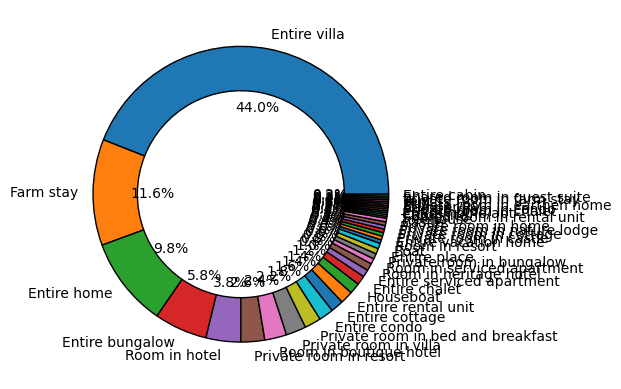

In [9]:
ax = df["roomType"].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='black'))
ax.set_ylabel('')
plt.show()

In [10]:
df["roomType"].value_counts()

roomType
Entire villa                         220
Farm stay                             58
Entire home                           49
Entire bungalow                       29
Room in hotel                         19
Private room in resort                13
Room in boutique hotel                12
Private room in villa                 11
Private room in bed and breakfast      9
Entire condo                           8
Entire cottage                         7
Entire rental unit                     7
Houseboat                              6
Entire chalet                          5
Entire serviced apartment              4
Room in heritage hotel                 4
Room in serviced apartment             3
Private room in bungalow               3
Entire place                           3
Boat                                   3
Room in resort                         2
Entire vacation home                   2
Private room in castle                 2
Private room in cottage                2
Private

### Visualizing accommodation capacity

D:\Software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='numberOfGuests', ylabel='Count'>

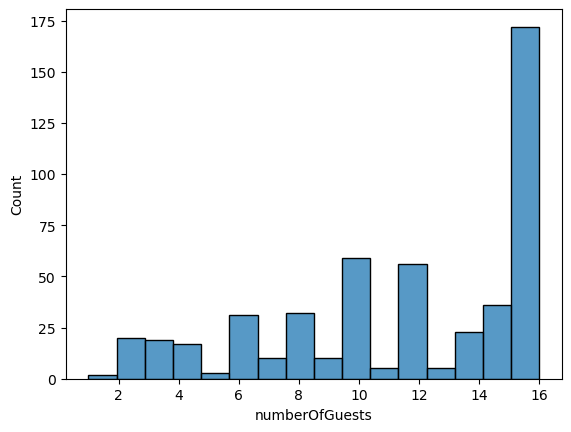

In [11]:
bi = len(df["numberOfGuests"].unique())
sns.histplot(df["numberOfGuests"],bins=bi)

In [12]:
df["numberOfGuests"].value_counts()

numberOfGuests
16    172
10     59
12     56
15     36
8      32
6      31
14     23
2      20
3      19
4      17
9      10
7      10
13      5
11      5
5       3
1       2
Name: count, dtype: int64

### Visualizing Hosting 

In [13]:
df.isHostedBySuperhost = df["isHostedBySuperhost"].replace({True:"Yes",False:"No"})

D:\Software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='isHostedBySuperhost', ylabel='Count'>

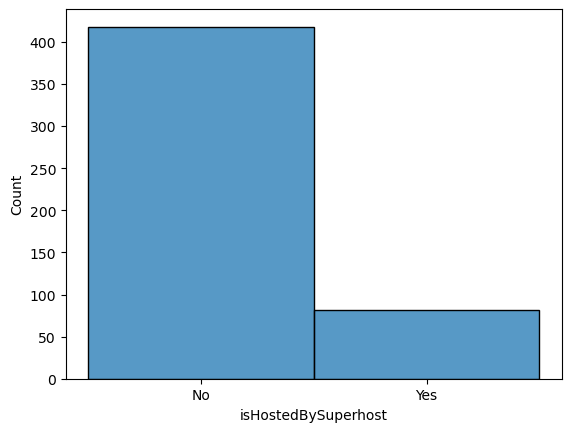

In [14]:
sns.histplot(df.isHostedBySuperhost)

In [15]:
df.isHostedBySuperhost.value_counts()

isHostedBySuperhost
No     418
Yes     82
Name: count, dtype: int64

### Getting state names

In [16]:
df.address.loc[df.address == "India"]

101    India
Name: address, dtype: object

In [17]:
df = df.drop(101)

In [18]:
df = df.reset_index()

In [31]:
for j,i in enumerate(df["address"]):
    i = i.split(",")
    if len(i) >= 3:
        df["State"][j] = i[-2].strip()
        df["Town"][j] = i[-3].strip()
    else:
        df["State"][j] = i[0].strip()
        df["Town"][j] = "NaN"

C:\Users\Adithya  R\AppData\Local\Temp\ipykernel_20864\3155524398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["State"][j] = i[-2].strip()
C:\Users\Adithya  R\AppData\Local\Temp\ipykernel_20864\3155524398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Town"][j] = i[-3].strip()
C:\Users\Adithya  R\AppData\Local\Temp\ipykernel_20864\3155524398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["State"][j] = i[-2].s

In [32]:
df.head()

,index,address,isHostedBySuperhost,location/lat,location/lng,name,numberOfGuests,pricing/rate/amount,roomType,stars,State,Town
0,0,"Manali, Himachal Pradesh, India",No,32.22330,77.18228,HighQ Manali / Deluxe Room,3,8946,Room in hotel,NaN,Himachal Pradesh,Manali
1,1,"Manali, Himachal Pradesh, India",No,32.22352,77.18152,Highq manali / 3 BHK Cottage,9,9124,Room in hotel,NaN,Himachal Pradesh,Manali
2,2,"Goa, India",No,15.50400,73.86600,Best view of the river from your terrace 04,4,9900,Private room in home,4.00,Goa,NaN
3,3,"Bhuntar, Himachal Pradesh, India",No,31.88656,77.14467,Shabashe,1,8684,Shared room in rental unit,NaN,Himachal Pradesh,Bhuntar
4,4,"Jaipur, Rajasthan, India",No,26.85991,75.66909,Luxurious Independent Studio with Wifi & Kitchen,1,20690,Entire condo,4.75,Rajasthan,Jaipur


In [33]:
df.State.value_counts()

State
Goa                            164
Maharashtra                     96
Rajasthan                       38
Uttarakhand                     33
Kerala                          25
Himachal Pradesh                24
Delhi                           23
Tamil Nadu                      21
Haryana                         15
Karnataka                       13
Uttar Pradesh                    4
Punjab                           3
Andhra Pradesh                   3
MH                               3
Gujarat                          3
TN                               2
Puducherry                       2
KA                               2
GA                               2
West Bengal                      2
Madhya Pradesh                   2
Andaman and Nicobar Islands      1
Dodamarg Maharashtra             1
Telangana                        1
Varca                            1
Uttrakhand                       1
कर्नाटक                          1
goa                              1
महाराष्ट्र    

### Visualizing AirBNB count in each state

D:\Software\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Software\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Software\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Software\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Software\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Software\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2366 (\N{DEVA

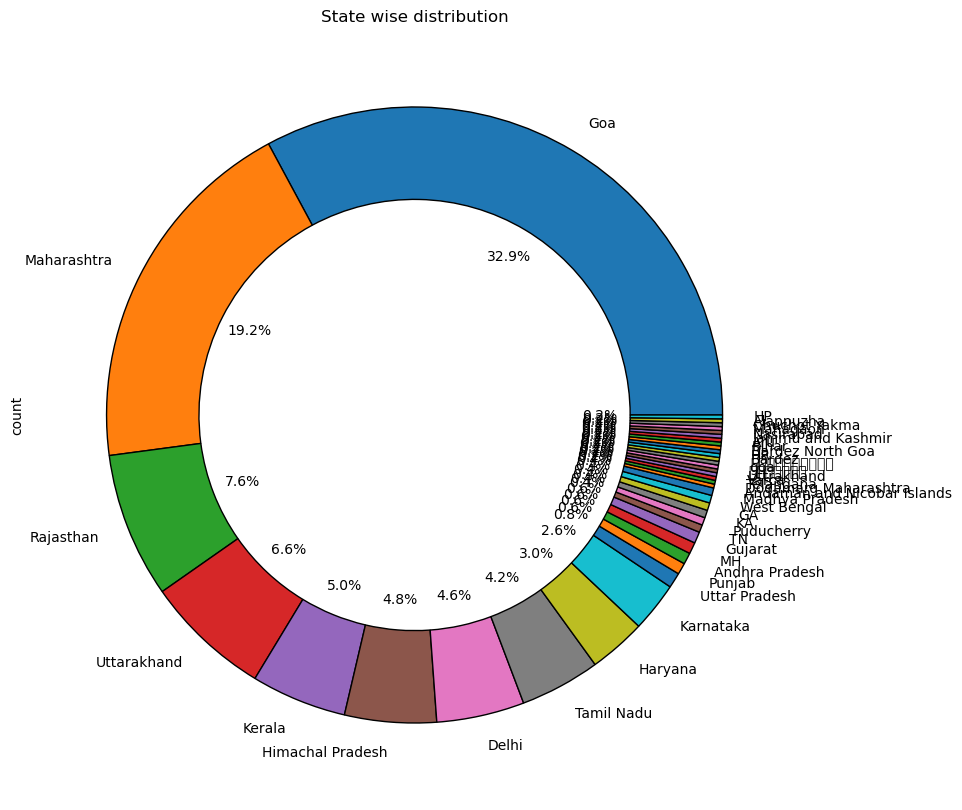

In [43]:
plt.figure(figsize=(10,10))
df.State.value_counts().plot.pie(autopct='%1.1f%%',wedgeprops=dict(width=0.3, edgecolor='black'))
plt.title("State wise distribution")
plt.show()

# Examining the states with a higher quantity of hotels

### GOA

In [45]:
goa = df.loc[df.State == "Goa"]

In [46]:
goa.head()

,index,address,isHostedBySuperhost,location/lat,location/lng,name,numberOfGuests,pricing/rate/amount,roomType,stars,State,Town
2,2,"Goa, India",No,15.50400,73.86600,Best view of the river from your terrace 04,4,9900,Private room in home,4.0,Goa,NaN
10,10,"Morjim, Goa, India",No,15.62707,73.73270,"Vedatmana By The Waves, Morjim",12,902,Entire villa,NaN,Goa,Morjim
14,14,"Sangolda, Goa, India",No,15.54799,73.81177,12 BR Mansion | Big Groups | Private Pool | Sc...,16,1374,Entire villa,NaN,Goa,Sangolda
16,16,"Parra, Goa, India",Yes,15.57329,73.77670,Perfect for Big Groups! 8BR Villa w Pool in Parra,16,978,Entire villa,NaN,Goa,Parra
19,19,"North Goa, Goa, India",No,15.56203,73.78613,Crystal Village 10 Bedroom Pvt Pool villa Nagoa,16,854,Entire home,NaN,Goa,North Goa


In [67]:
goa.shape

(164, 12)

D:\Software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


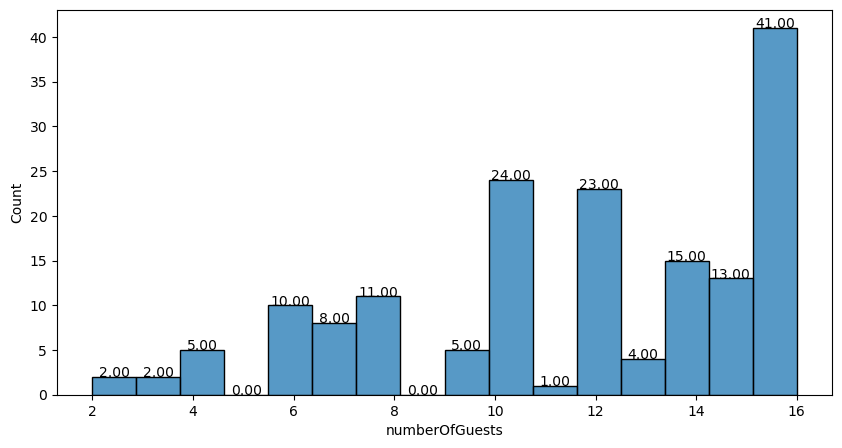

In [65]:
plt.figure(figsize=(10,5))
plot = sns.histplot(goa.numberOfGuests,bins = goa.numberOfGuests.max())
for p in plot.patches:
    plot.text(
        x = p.get_x() + p.get_width()/2.,
        y = p.get_height(),
        s = f'{p.get_height():.2f}',
        ha = "center"
    )
plt.show()

In [83]:
# room type for high capacity Air bnb's
goa.loc[df.numberOfGuests == 16].roomType.value_counts()

roomType
Entire villa                 25
Entire home                   9
Entire bungalow               3
Room in boutique hotel        2
Entire serviced apartment     1
Room in heritage hotel        1
Name: count, dtype: int64

In [84]:
goa["pricing/rate/amount"].max()

9900

In [85]:
goa["pricing/rate/amount"].min()

129

In [87]:
goa["pricing/rate/amount"].mode()

0    601
Name: pricing/rate/amount, dtype: int64

In [90]:
len(goa.loc[goa["pricing/rate/amount"] == 601])

9

In [116]:
goa["pricing/rate/amount"].describe()

count     164.000000
mean      710.512195
std       844.052752
min       129.000000
25%       444.500000
50%       549.000000
75%       782.000000
max      9900.000000
Name: pricing/rate/amount, dtype: float64

In [91]:
goa["pricing/rate/amount"].mean()

710.5121951219512

In [94]:
goa.loc[goa["pricing/rate/amount"] >= 710].shape

(53, 12)

In [98]:
goa.loc[goa["numberOfGuests"] == 16]["pricing/rate/amount"].describe()

count      41.000000
mean      839.341463
std       601.133288
min       421.000000
25%       545.000000
50%       731.000000
75%       902.000000
max      4209.000000
Name: pricing/rate/amount, dtype: float64

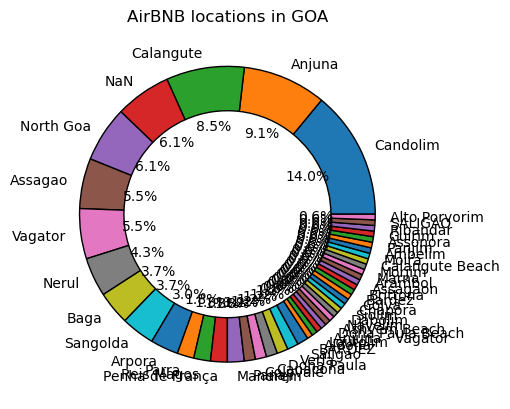

In [109]:
plot = goa["Town"].value_counts().plot.pie(autopct = "%1.1f%%",wedgeprops=dict(width=0.3, edgecolor='black'))
plot.set_ylabel('')
plt.title("AirBNB locations in GOA")
plt.show()

In [110]:
goa.loc[goa["Town"] == "Candolim"]["pricing/rate/amount"].describe()

count      23.000000
mean      576.478261
std       228.166181
min       148.000000
25%       445.000000
50%       513.000000
75%       639.500000
max      1153.000000
Name: pricing/rate/amount, dtype: float64

In [112]:
goa.loc[goa["Town"] == "Anjuna"]["pricing/rate/amount"].describe()

count      15.000000
mean      544.733333
std       233.328544
min       392.000000
25%       410.000000
50%       411.000000
75%       576.500000
max      1185.000000
Name: pricing/rate/amount, dtype: float64

In [113]:
goa.loc[goa["Town"] == "Calangute"]["pricing/rate/amount"].describe()


count      14.000000
mean      822.000000
std       659.217485
min       430.000000
25%       509.250000
50%       589.000000
75%       876.500000
max      3007.000000
Name: pricing/rate/amount, dtype: float64

#### Overview Goa
Goa is home to 164 Airbnb properties. The typical cost for an Airbnb in Goa is ₹710. The price range for rooms begins at ₹129 and goes up to ₹9990. Half of the hotels are priced between ₹444 and ₹782. A majority of the rooms can accommodate 16 guests, with 41 such properties available in Goa. The average price for these villas is ₹839, with prices ranging from ₹421 to ₹4209. The highest concentration of Airbnb properties can be found in Candolim (23), followed by Anjuna (15), and Calangute (14). It’s worth noting that accommodations in Calangute tend to be slightly more expensive than the other two locations.

### Maharashtra

In [150]:
mah = df.loc[df.State.isin (["Maharashtra","MH"])]

In [151]:
mah.head()

,index,address,isHostedBySuperhost,location/lat,location/lng,name,numberOfGuests,pricing/rate/amount,roomType,stars,State,Town
12,12,"Awas, Maharashtra, India",No,18.76514,72.87878,StayVista - Pranaam - 6Bhk Luxury Alibaug,15,912,Entire villa,NaN,Maharashtra,Awas
21,21,"Awas, Maharashtra, India",Yes,18.76034,72.88551,10 BHK Luxury Villa w Pool - Modern Cottage Style,16,1325,Entire villa,4.89,Maharashtra,Awas
30,30,"Karjat, Maharashtra, India",No,18.91863,73.33386,Private Pool Villa with meals for 10+ guests.,16,962,Entire villa,NaN,Maharashtra,Karjat
33,33,"Nashik, Maharashtra, India",No,20.07376,73.64485,Welcome to 16 Bedroom Gem hidden in Nature!,16,1082,Farm stay,NaN,Maharashtra,Nashik
34,34,"Mumbai, Maharashtra, India",No,18.92245,72.83399,45 foot 3BR Yacht at Mumbai Harbour,8,1503,Boat,NaN,Maharashtra,Mumbai


In [152]:
mah["pricing/rate/amount"].describe()

count      99.000000
mean      627.484848
std       500.308402
min       133.000000
25%       435.000000
50%       498.000000
75%       621.500000
max      4269.000000
Name: pricing/rate/amount, dtype: float64

D:\Software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


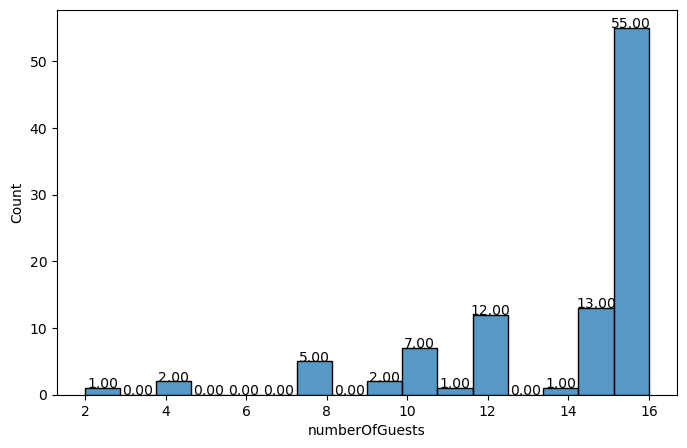

In [153]:
plt.figure(figsize=(8,5))
plot = sns.histplot(mah["numberOfGuests"],bins = 16)
for p in plot.patches:
    plot.text(
        x = p.get_x() + p.get_width()/2.,
        y = p.get_height(),
        s = f'{p.get_height():.2f}',
        ha = "center"
    )

plt.show()

In [154]:
mah.loc[mah["numberOfGuests"] == 16]["pricing/rate/amount"].describe()

count      55.000000
mean      581.254545
std       307.256150
min       133.000000
25%       454.500000
50%       505.000000
75%       615.500000
max      1674.000000
Name: pricing/rate/amount, dtype: float64

<Axes: ylabel='count'>

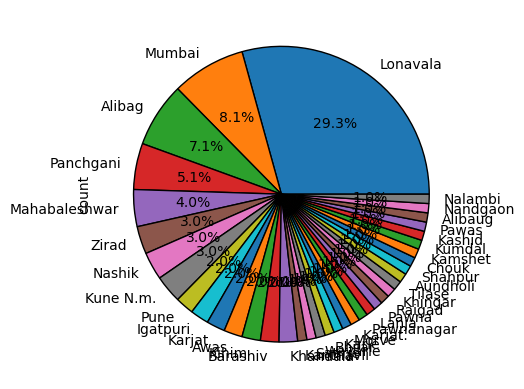

In [156]:
mah["Town"].value_counts().plot.pie(autopct = "%1.1f%%",wedgeprops=dict(width=1, edgecolor='black'))

In [157]:
mah.loc[mah["Town"] == "Lonavala"]["pricing/rate/amount"].describe()

count      29.000000
mean      512.103448
std       310.729481
min       133.000000
25%       397.000000
50%       455.000000
75%       612.000000
max      1481.000000
Name: pricing/rate/amount, dtype: float64

In [158]:
mah.loc[mah["Town"] == "Mumbai"]["pricing/rate/amount"].describe()


count       8.00000
mean      782.87500
std       588.42925
min       391.00000
25%       447.50000
50%       481.00000
75%       826.50000
max      1924.00000
Name: pricing/rate/amount, dtype: float64

In [160]:
mah.loc[mah["Town"] == "Alibag"]["pricing/rate/amount"].describe()


count       7.000000
mean      698.857143
std       494.546738
min       458.000000
25%       475.000000
50%       481.000000
75%       599.500000
max      1804.000000
Name: pricing/rate/amount, dtype: float64

#### Overview of Maharashtra
Maharashtra boasts 99 Airbnb properties, with prices averaging at ₹627 and ranging from ₹133 to ₹4269. Half of the accommodations in Maharashtra fall within the price bracket of ₹435 to ₹621. Approximately 55 Airbnb properties in Maharashtra can house 16 guests, marking the highest accommodation capacity in the state. Lonavala is the hotspot for hotels, accounting for 29.3% of the total, followed by Mumbai and Alibag, contributing 8.1% and 7.1% respectively to the hotel distributio.n
000000

### Conclusion

1. In a total of 500 Airbnb listings, a significant 44% (220 listings) are Entire Villas, followed by 11.6% (58 listings) being Farmstays, and 9.8% (49 listings) being Entire Homes. 
2. The majority of these accommodations are designed to host larger groups, with the most common room configuration being for 16 members (172 listings), followed by rooms for 10 members (59 listings), and 12 members (56 listings). 
3. Interestingly, a vast majority of these listings, 418 to be precise, are not hosted by a Superhost.
4. Geographically, these Airbnbs are spread across various locations, with the highest concentration in Goa at 32.9%, followed by Maharashtra at 19.2%, and Rajasthan at 7.6%.